In [1]:
# importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_style('darkgrid')

In [2]:
# loading data
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,tweet_datetime,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage,favorite_count,retweet_count,prediction_picture,prediction_breed,prediction_confidence
0,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,NaN,NaN,789,590,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,NaN
1,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,NaN,315,91,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador Retriever,0.825670
2,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,NaN,194,60,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan Terrier,0.676376
3,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,NaN,NaN,259,100,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy Poodle,0.304175
4,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,10.0,NaN,NaN,534,232,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                 1993 non-null int64
tweet_datetime           1993 non-null object
tweet_source             1993 non-null object
tweet_content            1993 non-null object
tweet_url                1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
dog_name                 1349 non-null object
dog_stage                340 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
prediction_picture       1993 non-null object
prediction_breed         1685 non-null object
prediction_confidence    1685 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 218.1+ KB


In [4]:
# set datapoints to their appropriate types
df['tweet_id'] = df['tweet_id'].astype(object)
df['tweet_datetime'] = pd.to_datetime(df.tweet_datetime)
df['tweet_source'] = df['tweet_source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                 1993 non-null object
tweet_datetime           1993 non-null datetime64[ns]
tweet_source             1993 non-null category
tweet_content            1993 non-null object
tweet_url                1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
dog_name                 1349 non-null object
dog_stage                340 non-null category
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
prediction_picture       1993 non-null object
prediction_breed         1685 non-null object
prediction_confidence    1685 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 191.1+ KB


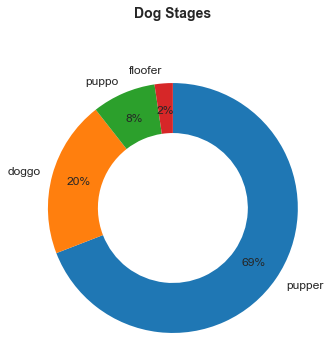

In [6]:
# code for the pie chart seen above
sorted_counts = df['dog_stage'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', pctdistance=0.78, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, textprops={'fontsize': 12})
plt.title('Dog Stages', y=1.18, fontdict={'fontsize': 14, 'fontweight' : 'semibold'})
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

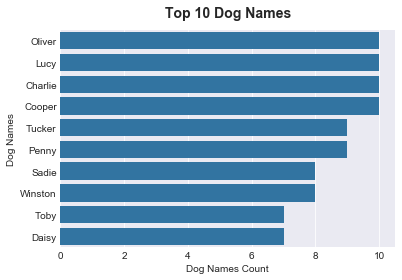

In [17]:
basic_color = sns.color_palette()[0]
sns.countplot(data=df, y=df.dog_name, order=df.dog_name.value_counts().iloc[:10].index,
            color = basic_color);

plt.title('Top 10 Dog Names', y=1.03, fontdict={'fontsize': 14, 'fontweight' : 'semibold'})
plt.xlabel('Dog Names Count')
plt.ylabel('Dog Names');

In [12]:
df.dog_name.value_counts()

Oliver      10
Lucy        10
Charlie     10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Toby         7
Daisy        7
Lola         7
Jax          6
Bella        6
Koda         6
Bo           6
Stanley      6
Milo         5
Chester      5
Buddy        5
Scout        5
Louis        5
Dave         5
Oscar        5
Bailey       5
Rusty        5
Leo          5
Chip         4
Winnie       4
Gary         4
Sophie       4
            ..
Acro         1
Ralphus      1
Edgar        1
Toffee       1
Carper       1
Mollie       1
Odin         1
Hazel        1
Tayzie       1
Herb         1
Huck         1
Bones        1
Stuart       1
Traviss      1
Superpup     1
Sailor       1
Bode         1
Maude        1
Daniel       1
Stefan       1
Donny        1
Ambrose      1
Kollin       1
Clyde        1
Levi         1
Laela        1
Reagan       1
Bloop        1
Pippin       1
Jimbo        1
Name: dog_name, Length: 913, dtype: int64